In [ ]:
# This code generates the figures in the supplementary information
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv('predictions.csv') 
new_mdb = data[[ "SITE", "DATE", "Field.ET", "AMLETT", "GB", "GB_Clustering"]]
new_mdb = new_mdb.sample(frac=1) # Shuffle the data

new_mdb['DATE'] = pd.to_datetime(new_mdb['DATE'])

X = new_mdb.iloc[:, 1:-1].values
y = new_mdb.iloc[:, -1].values

site_names = ['BBB', 'bookybb', 'bookyref', 'bookywestern', 'CRGG',
       'CS1', 'CS3', 'CS4', 'CS5', 'LS3BB', 'LS1RGG', 'LS2RGG',
       'MS1BB', 'MS2BB', 'Y1', 'Y9', 'Y2', 'Y4', 'Y6', 'Y7', 'Y8',
       'Y5', 'Y3']

name_mapping = {
    'booky': 'BBB',
    'bookybb': 'bookybb',
    'bookyref': 'bookyref',
    'bookywestern': 'bookywestern',
    'calprrg': 'CRGG',
    'calps1': 'CS1',
    'calps3': 'CS3',
    'calps4': 'CS4',
    'calps5': 'CS5',
    'lberribee': 'LS3BB',
    'ld': 'LS1RGG',
    'lw': 'LS2RGG',
    'mc': 'MS1BB',
    'mp2': 'MS2BB',
    'yg2': 'Y1',
    'yg3': 'Y9',
    'yl1': 'Y2',
    'yl2': 'Y4',
    'ypb1': 'Y6',
    'ypb2': 'Y7',
    'ypb3': 'Y8',
    'ys1': 'Y5',
    'ys2': 'Y3'}

new_mdb['SITE'] = new_mdb['SITE'].replace(name_mapping)


In [ ]:
# Generate the individual line graphs
for site in site_names:
    booky = new_mdb.loc[new_mdb['SITE'] == site]
    booky = booky.sort_values('DATE')
    booky['DATE'] = booky['DATE'].dt.strftime('%Y-%m-%d')

    fig, ax = plt.subplots()

    ax.plot(booky['DATE'], booky['Field.ET'], label='ET', color="black")
    ax.plot(booky['DATE'], booky['AMLETT'], label='AMLETT', color="green", alpha=0.3)
    ax.plot(booky['DATE'], booky['GB_Clustering'], label='GMM GB', color="red")

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.tick_params(axis='x', rotation=45)

    ax.set_xlabel('DATE')
    ax.set_ylabel('Values')
    ax.set_title(f'{site}')

    ax.legend()
    fig.tight_layout()

    plt.savefig(f"Compare\\{site}.jpeg", dpi=300)
    plt.close()


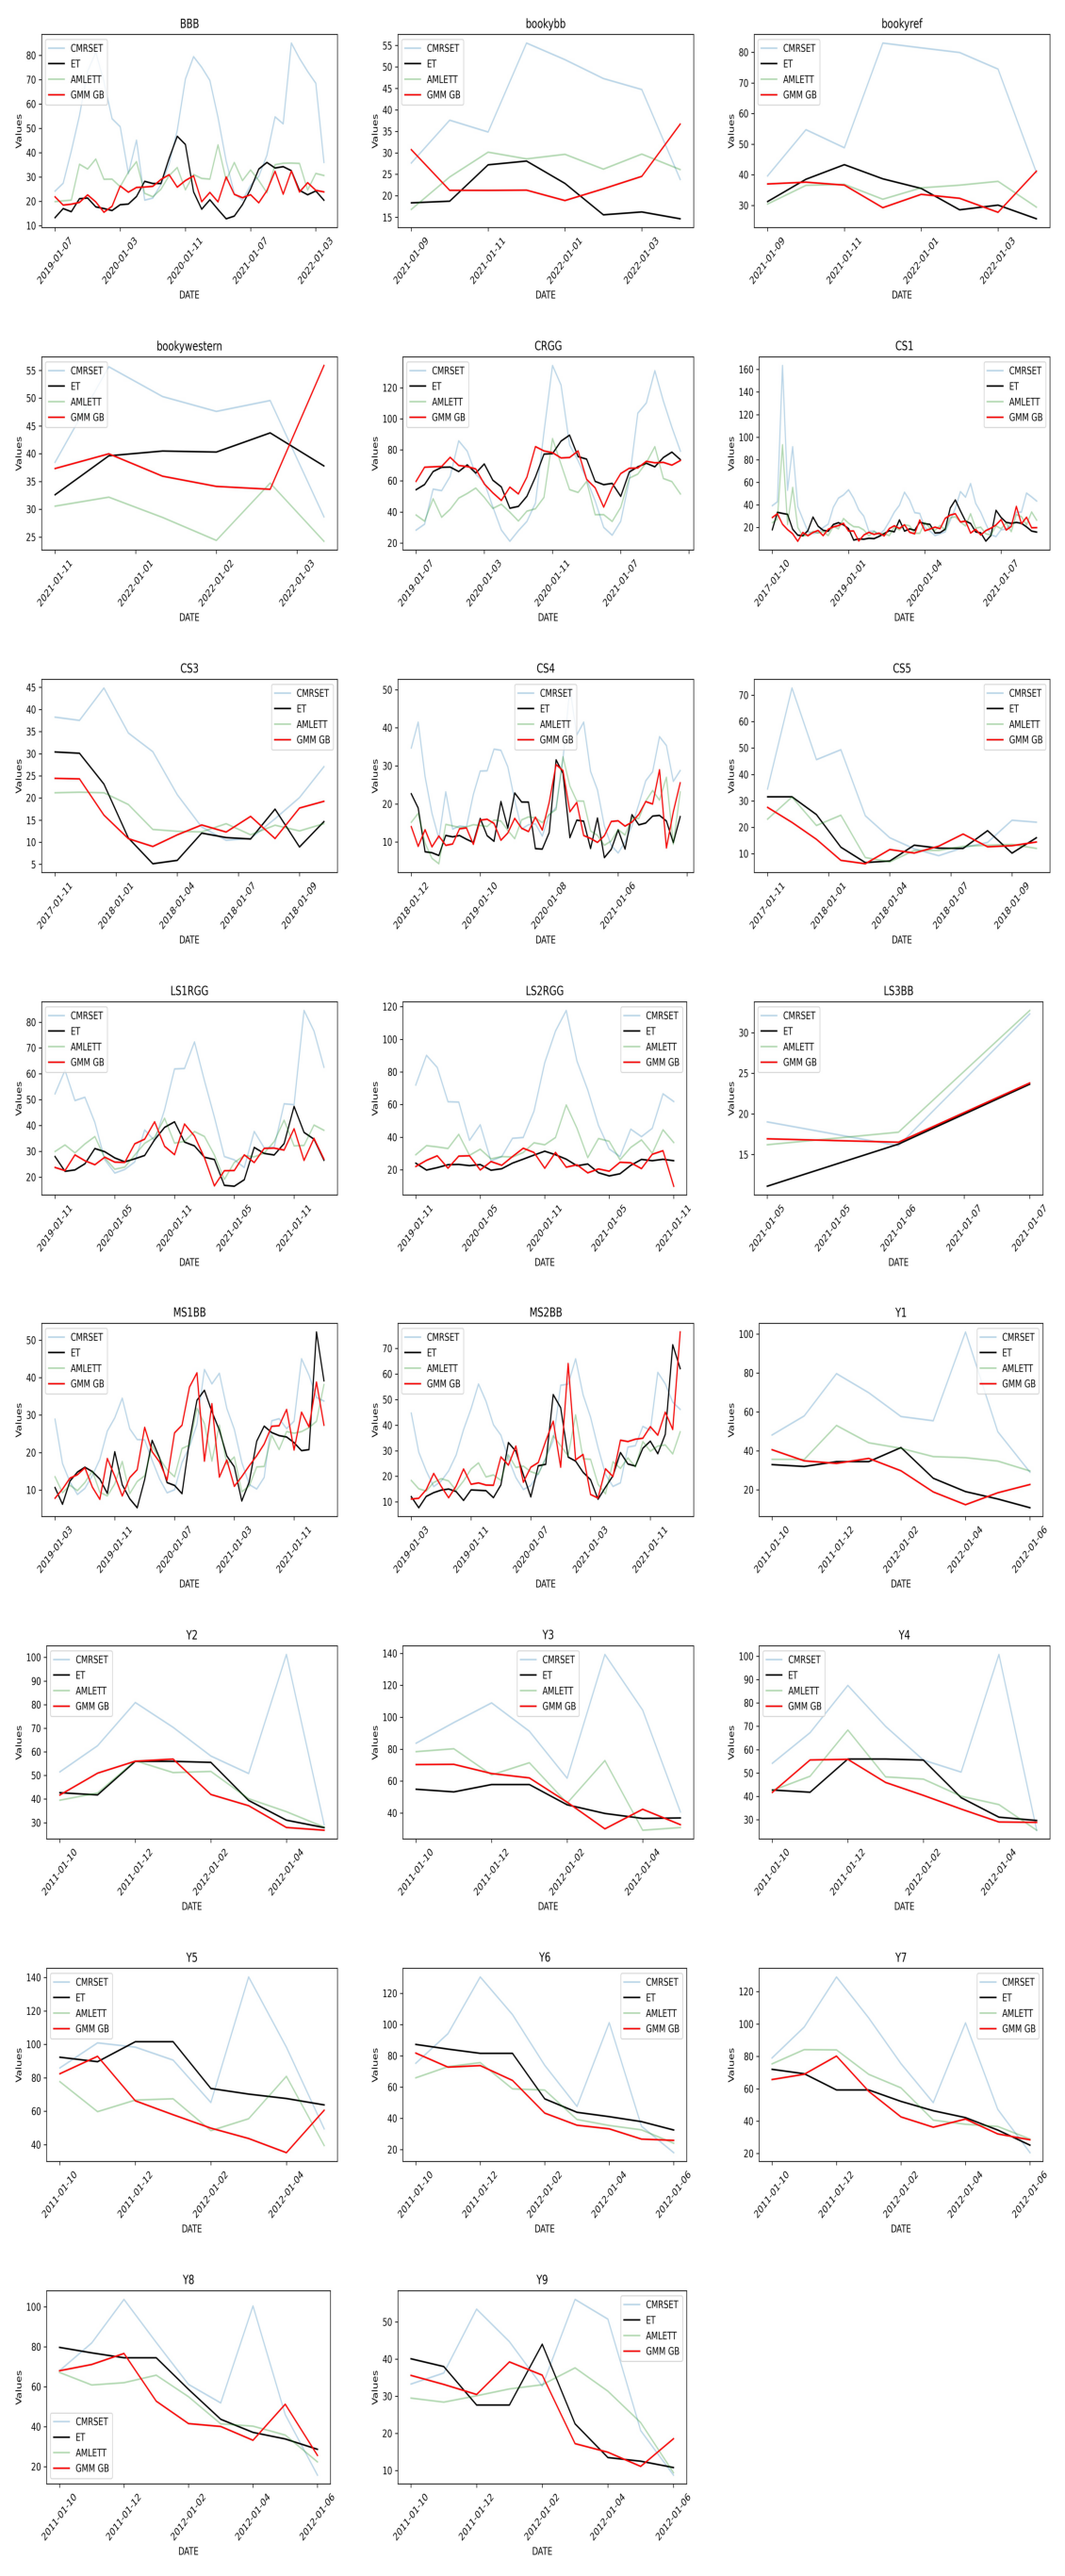

In [ ]:
# Combine all the line graphs into one grid

import os
image_directory = "Compare"
image_files = [file for file in os.listdir(image_directory) if file.endswith(".jpeg")]

num_cols = 3
num_rows = 8

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 50))

# Loop through the image files and plot each image in the corresponding subplot
for idx, image_file in enumerate(image_files):
    row = idx // num_cols
    col = idx % num_cols
    
    # Load the image and plot it in the appropriate subplot
    image_path = os.path.join(image_directory, image_file)
    image = plt.imread(image_path)
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

# Remove any extra empty subplots
if len(image_files) < num_rows * num_cols:
    for idx in range(len(image_files), num_rows * num_cols):
        row = idx // num_cols
        col = idx % num_cols
        fig.delaxes(axes[row, col])

fig.subplots_adjust(wspace=0.05, hspace=0.05)

for ax in axes.flat:
    ax.set_aspect('auto')

plt.savefig(f"Compare\\grid2.jpeg", dpi=300)
